# Time Series Forecasting using Arimax Model


### Loading the Libraries and the Dataset

In [42]:
import pandas as pd
%matplotlib inline 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_csv('dataset.csv', index_col='Month', parse_dates=True,date_parser=lambda x: pd.to_datetime(x, format='%y-%b'))


C:\Users\Franniel\AppData\Local\Temp\ipykernel_4140\856138283.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('dataset.csv', index_col='Month', parse_dates=True,date_parser=lambda x: pd.to_datetime(x, format='%y-%b'))


In [43]:
data.head(10)

,Index,Price,Production,Withdrawals,GlobalPrice,ExchangeRate,TempMax,TempAvg,Precipitation
Month,,,,,,,,,
2014-09-01,1,51.51,537770,1418420,0.1470,44.08,28,27,456.59
2014-10-01,2,51.46,1623075,1355836,0.1648,44.80,29,27,436.73
2014-11-01,3,51.28,2277043,2156729,0.1588,44.95,29,28,265.32
2014-12-01,4,51.65,2223994,1663150,0.1499,44.69,28,27,182.00
2015-01-01,5,51.19,2259613,1714490,0.1506,44.60,28,27,82.83
2015-02-01,6,51.25,3124172,1777931,0.1451,44.22,28,27,21.90
2015-03-01,7,51.15,3939203,2154934,0.1284,44.45,30,28,5.80
2015-04-01,8,51.95,2405134,1679034,0.1294,44.41,31,29,67.44
2015-05-01,9,52.88,1711529,2031509,0.1270,44.61,30,29,186.11


#### Steps for ARIMAX
1. The time series data must be stationary
2. Provide a forecast for the exogeneous variables
3. Train-Test split
4. Error metric

Start by forecasting each variable using ARIMA


##### Price

The price is going to be the dependent variable

<Axes: xlabel='Month'>

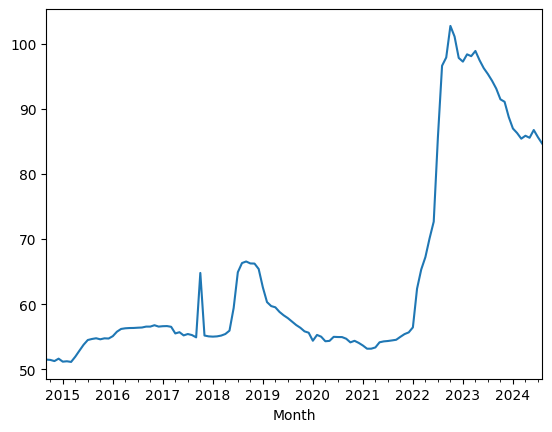

In [44]:
data['Price'].plot()

Initial ADF Test

In [45]:
def ADF_test(data):
    p = adfuller(data)[1]
    print (f'P-value: {p} < 0.05')
    if p < 0.05:
        print('Series is stationary')
    else:
        print('Series is not stationary')

In [46]:
ADF_test(data['Price'])

P-value: 0.663961545174224 < 0.05
Series is not stationary


Since the data is not stationary, Let's perform differencing

In [47]:
data['Price_diff'] = data['Price'].diff()
data['Price_diff'].dropna()

data_2 = data[['Price_diff' ,'Price']]
data_2.head(12)

,Price_diff,Price
Month,,
2014-09-01,NaN,51.51
2014-10-01,-0.05,51.46
2014-11-01,-0.18,51.28
2014-12-01,0.37,51.65
2015-01-01,-0.46,51.19
2015-02-01,0.06,51.25
2015-03-01,-0.10,51.15
2015-04-01,0.80,51.95
2015-05-01,0.93,52.88


**How Differencing works**

differenced_month = month_1 - month_2
difference = {2014-09} - {2014-10}
difference = 51.51 - 

Look at the behaviour of the Price after differencing

<Axes: xlabel='Month'>

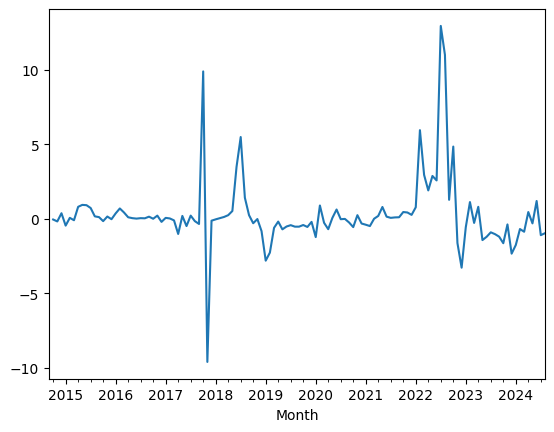

In [48]:
data['Price_diff'].plot()

In [50]:
ADF_test(data['Price_diff'].dropna())

P-value: 5.67356265349366e-06 < 0.05
Series is stationary
